load sensitivity for one tire

max force for load = 100 is 182.6649609682827, mu = 1.826649609682827
max force for load = 500 is 777.5498685899996, mu = 1.5550997371799993
max force for load = 1000 is 1450.9593599191576, mu = 1.4509593599191575
max force for load = 3000 is 3899.9979402141203, mu = 1.2999993134047068
max force for load = 4000 is 5052.533952389626, mu = 1.2631334880974066
max force for load = 5000 is 6176.298145271916, mu = 1.2352596290543831
max force for load = 8000 is 9428.361736878765, mu = 1.1785452171098456
max force for load = 10000 is 11525.37987021258, mu = 1.152537987021258
max force for load = 15000 is 16601.119721265546, mu = 1.1067413147510363
max force for load = 20000 is 21507.11931780509, mu = 1.0753559658902545


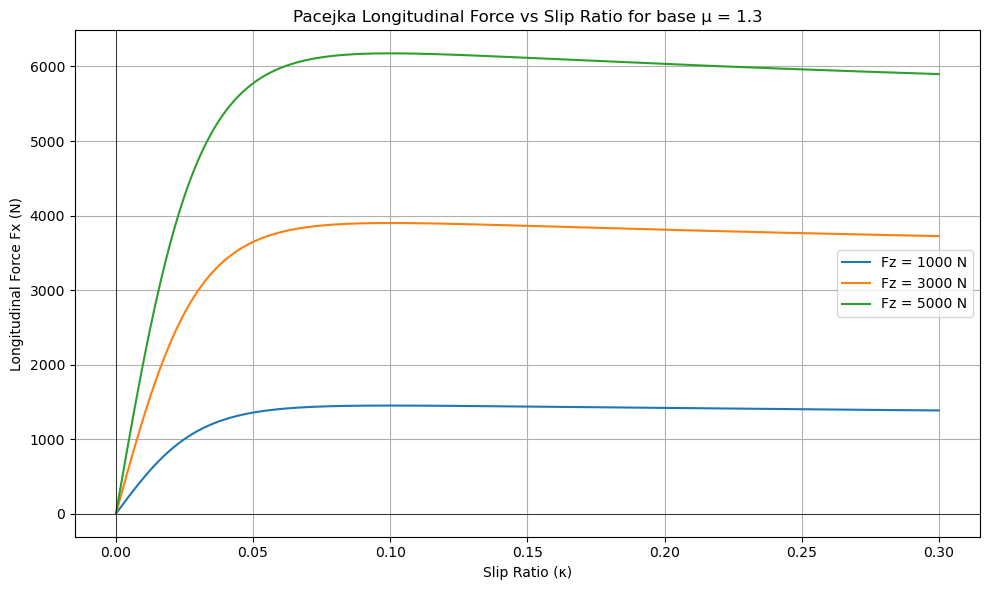

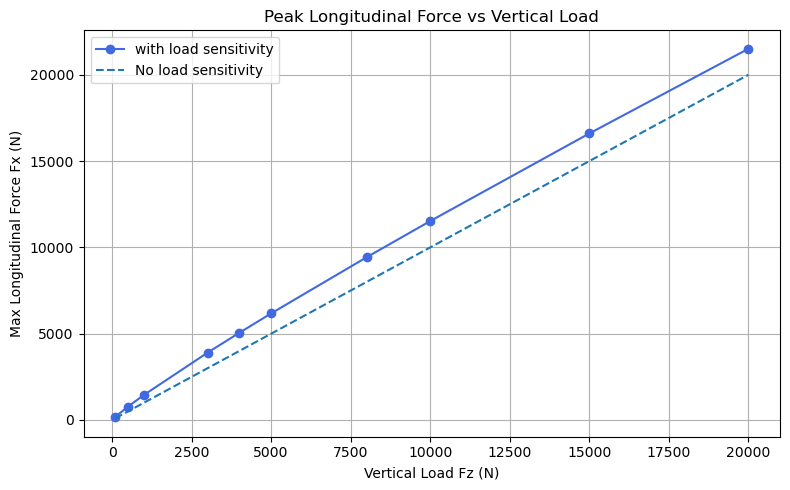

In [474]:
import numpy as np
import matplotlib.pyplot as plt

# Pacejka parameters
mu = 1.3    # constant friction coefficient
B = 18.01          # stiffness factor
C = 1.9           # shape factor
E = 0.97          # curvature factor
# Vertical loads to plot
Fz_list = [100, 500, 1000, 3000, 4000, 5000, 8000, 10000, 15000, 20000]  # Force on driven tire
Fz0 = 3000 #Newtons 300kg
# Slip ratio range
kappa_vals = np.linspace(0, 0.3, 500)  # from -30% to +30%

curve = 0.032#0.037
def pacejka_full(kappa, mu, Fz, B, C, E):
    mu_eff = mu * (Fz0 / Fz) ** 0.1
    #mu_eff = mu - 0.2 * np.log(Fz / Fz0)
    #mu_eff = mu - curve * (Fz - Fz0)/Fz0
    #mu_eff = mu * (2 * Fz / (Fz + Fz0))


    # Peak force
    return mu_eff * Fz * np.sin(C * np.arctan(B * kappa - E * (B * kappa - np.arctan(B * kappa))))

# Plotting
max_forces = []
plt.figure(figsize=(10, 6))
for Fz in Fz_list:
    Fx = pacejka_full(kappa_vals, mu, Fz, B, C, E)
    print(f"max force for load = {Fz} is {max(Fx)}, mu = {max(Fx)/Fz}")
    max_forces.append(max(Fx))
    label = f"Fz = {Fz} N"

    if Fz in [1000, 3000, 5000]:
        plt.plot(kappa_vals, Fx, label=label)

plt.title(f"Pacejka Longitudinal Force vs Slip Ratio for base μ = {mu}")
plt.xlabel("Slip Ratio (κ)")
plt.ylabel("Longitudinal Force Fx (N)")
plt.grid(True)
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(Fz_list, max_forces, marker='o', linestyle='-', color='royalblue', label='with load sensitivity')
plt.plot(Fz_list, Fz_list, linestyle='--', label="No load sensitivity")
plt.title("Peak Longitudinal Force vs Vertical Load")
plt.xlabel("Vertical Load Fz (N)")
plt.ylabel("Max Longitudinal Force Fx (N)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



for model that assumes the load on 2 tires

max force for load = 2000 is 4350.664368861086
max force for load = 2000 is 4449.33098341693


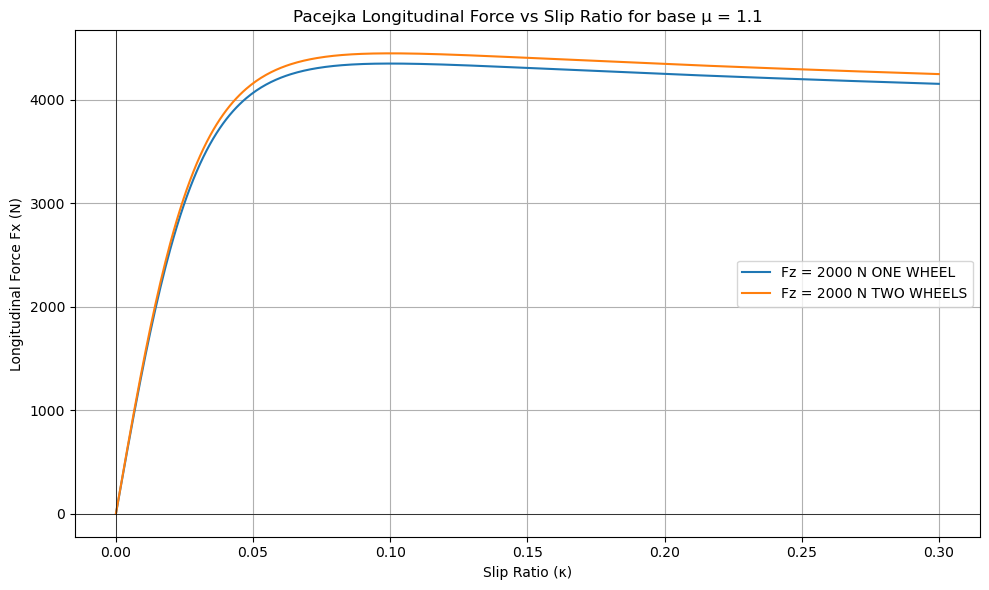

In [475]:
import numpy as np
import matplotlib.pyplot as plt

# Pacejka parameters
mu = 1.1      # constant friction coefficient
B = 18.01          # stiffness factor
C = 1.9           # shape factor
E = 0.97          # curvature factor
# Vertical loads to plot
Fz_list = [100, 500, 1000, 3000, 5000, 8000, 10000, 15000, 20000]  # Force on driven tire
Fz0 = 3000 #Newtons nominal for one tire
# Slip ratio range
kappa_vals = np.linspace(0, 0.3, 500)  # from -30% to +30%


def pacejka_one_wheel(kappa, mu, Fz, B, C, E):
    mu_eff = mu - 0.037 * (2*Fz - Fz0)/Fz0

    # Peak force
    return mu_eff * 2*Fz * np.sin(C * np.arctan(B * kappa - E * (B * kappa - np.arctan(B * kappa))))

def pacejka_2_separate_wheels(kappa, mu, Fz, B, C, E):
    mu_eff = mu - 0.037 * (Fz - Fz0)/Fz0

    # Peak force
    return 2* mu_eff * Fz * np.sin(C * np.arctan(B * kappa - E * (B * kappa - np.arctan(B * kappa))))

# Plotting
plt.figure(figsize=(10, 6))
for Fz in [2000]: # assume 200kg on front axis, launching a fwd car
    Fx = pacejka_one_wheel(kappa_vals, mu, Fz, B, C, E)
    print(f"max force for load = {Fz} is {max(Fx)}")
    label = f"Fz = {Fz} N ONE WHEEL"
    plt.plot(kappa_vals, Fx, label=label)

for Fz in [2000]:
    Fx = pacejka_2_separate_wheels(kappa_vals, mu, Fz, B, C, E)
    print(f"max force for load = {Fz} is {max(Fx)}")
    label = f"Fz = {Fz} N TWO WHEELS"
    plt.plot(kappa_vals, Fx, label=label)

plt.title(f"Pacejka Longitudinal Force vs Slip Ratio for base μ = {mu}")
plt.xlabel("Slip Ratio (κ)")
plt.ylabel("Longitudinal Force Fx (N)")
plt.grid(True)
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.tight_layout()
plt.show()



simulation test, no load sensitivity

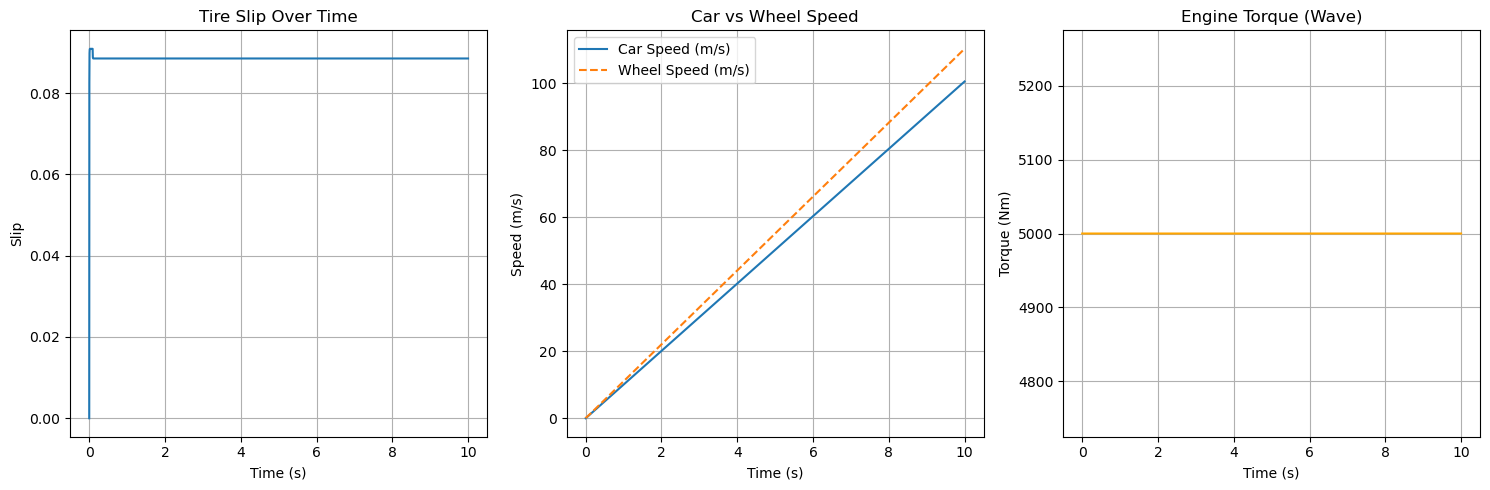

In [476]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
dt = 0.0001  # time step (s)
mass = 1500  # car mass (kg)
wheel_inertia = 10  # wheel moment of inertia (kg·m²)
wheel_radius = 0.308  # wheel radius (m)
g = 9.81
normal_force = mass * g  # total normal force for simplicity

# Magic Formula coefficients (simplified Pacejka)
B = 10
C = 1.9
D = mu
E = 0.97

# Engine torque as a sinusoidal wave function
def engine_torque(t):
    return 5000# * np.abs(np.sin(0.5 * t))

# Magic Formula function
def magic_formula(slip):
    return D * np.sin(C * np.arctan(B * slip - E * (B * slip - np.arctan(B * slip))))

# Simulation parameters
sim_duration = 10  # seconds
n_steps = int(sim_duration / dt)

# State variables
v = 0  # car velocity (m/s)
omega = 0  # wheel angular velocity (rad/s)

# Data storage for plotting
time_data = []
v_data = []
omega_data = []
slip_data = []
torque_data = []

# Simulation loop
for step in range(n_steps):
    time = step * dt
    T = engine_torque(time)

    wheel_speed = omega * wheel_radius
    slip = (wheel_speed - v) / max(abs(wheel_speed), 1)
    slip = np.clip(slip, -1, 1)
    Fx = magic_formula(slip) * normal_force

    # Acceleration
    a = Fx / mass
    alpha = (T - Fx * wheel_radius) / wheel_inertia

    # State updates
    v += a * dt
    omega += alpha * dt

    # Store data
    time_data.append(time)
    v_data.append(v)
    omega_data.append(wheel_speed)
    slip_data.append(slip)
    torque_data.append(T)

# Plotting
plt.figure(figsize=(15, 5))

# Plot 1: Slip
plt.subplot(1, 3, 1)
plt.plot(time_data, slip_data)
plt.title('Tire Slip Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Slip')
plt.grid(True)

# Plot 2: Car and Wheel Speeds
plt.subplot(1, 3, 2)
plt.plot(time_data, v_data, label='Car Speed (m/s)')
plt.plot(time_data, omega_data, label='Wheel Speed (m/s)', linestyle='--')
plt.title('Car vs Wheel Speed')
plt.xlabel('Time (s)')
plt.ylabel('Speed (m/s)')
plt.legend()
plt.grid(True)

# Plot 3: Engine Torque Wave
plt.subplot(1, 3, 3)
plt.plot(time_data, torque_data, color='orange')
plt.title('Engine Torque (Wave)')
plt.xlabel('Time (s)')
plt.ylabel('Torque (Nm)')
plt.grid(True)

plt.tight_layout()
plt.show()


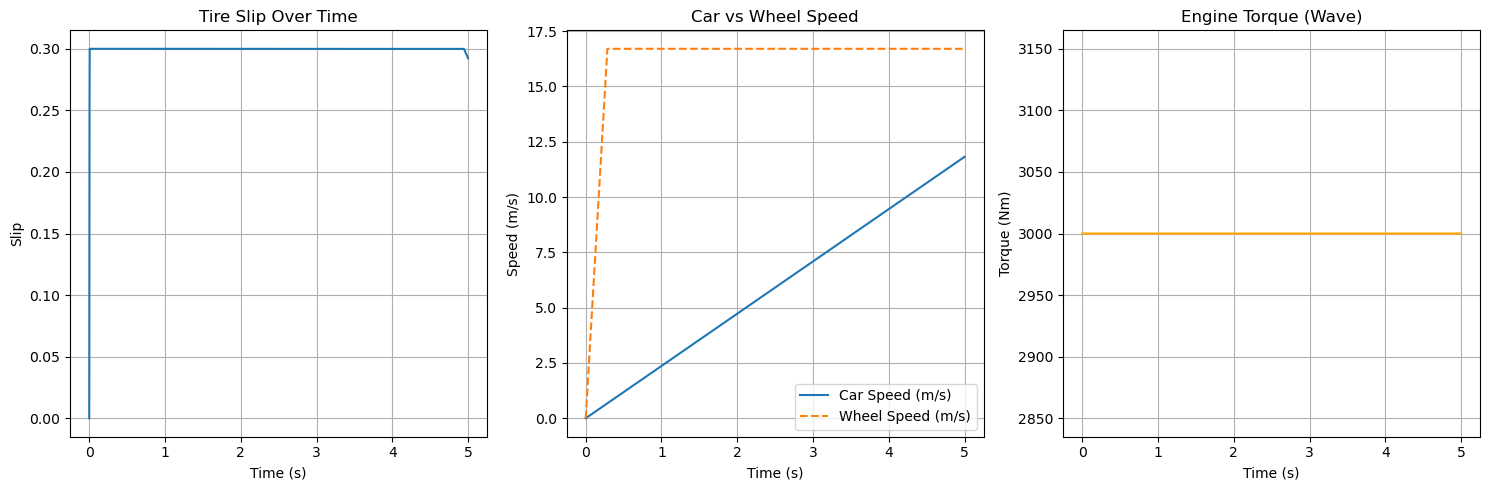

In [477]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
dt = 0.0001  # time step (s)
mass = 1500  # car mass (kg)
wheel_inertia = 10  # wheel moment of inertia (kg·m²)  BOTH
wheel_radius = 0.308  # wheel radius (m)
g = 9.81
normal_force = mass * g  # total normal force for simplicity

# Magic Formula coefficients (simplified Pacejka)
B = 10
C = 1.9
D = 0.9
E = 0.97

# Engine torque as a sinusoidal wave function
def engine_torque(t):
    return 3000# * np.abs(np.sin(0.5 * t))

# Magic Formula function
def magic_formula(kappa):
    Fz = 0.5 * mass / 2
    #mu_eff = mu - 0.037 * (Fz - Fz0)/Fz0
    mu_eff = mu * (2 * Fz / (Fz + Fz0))


    # Peak force of one tire, fwd
    res = mu_eff * np.sin(C * np.arctan(B * kappa - E * (B * kappa - np.arctan(B * kappa))))
    return 2 * res # peak force of 2 tires

# Simulation parameters
sim_duration = 5  # seconds
n_steps = int(sim_duration / dt)

# State variables
v = 0  # car velocity (m/s)
omega = 0  # wheel angular velocity (rad/s)

# Data storage for plotting
time_data = []
v_data = []
omega_data = []
slip_data = []
torque_data = []

redline_wheel_sp = 16.7
# Simulation loop
for step in range(n_steps):
    time = step * dt
    T = engine_torque(time)

    wheel_speed = min(omega * wheel_radius, redline_wheel_sp)
    slip = (wheel_speed - v) / max(abs(wheel_speed), 1)
    slip = np.clip(slip, 0, 0.3)
    max_Fx = magic_formula(slip) * (0.5 * mass * g) #MF * Fz
    Fx = min(T / wheel_radius, max_Fx)

    # Acceleration
    a = Fx / mass
    alpha = (T - Fx * wheel_radius) / wheel_inertia

    # State updates
    v += a * dt
    omega += alpha * dt

    # Store data
    time_data.append(time)
    v_data.append(v)
    omega_data.append(wheel_speed)
    slip_data.append(slip)
    torque_data.append(T)

# Plotting
plt.figure(figsize=(15, 5))

# Plot 1: Slip
plt.subplot(1, 3, 1)
plt.plot(time_data, slip_data)
plt.title('Tire Slip Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Slip')
plt.grid(True)

# Plot 2: Car and Wheel Speeds
plt.subplot(1, 3, 2)
plt.plot(time_data, v_data, label='Car Speed (m/s)')
plt.plot(time_data, omega_data, label='Wheel Speed (m/s)', linestyle='--')
plt.title('Car vs Wheel Speed')
plt.xlabel('Time (s)')
plt.ylabel('Speed (m/s)')
plt.legend()
plt.grid(True)

# Plot 3: Engine Torque Wave
plt.subplot(1, 3, 3)
plt.plot(time_data, torque_data, color='orange')
plt.title('Engine Torque (Wave)')
plt.xlabel('Time (s)')
plt.ylabel('Torque (Nm)')
plt.grid(True)

plt.tight_layout()
plt.show()
